In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set variables
alpha = 0
beta = 0.015
sigma_u = 0.053
theta = 0
sigma_v = 0.044
rho = 0.98
rho_uv = -0.8  
T_values = np.arange(120, 1201, 120)  
B = 250  
results = pd.DataFrame(index=T_values, columns=['Mean', '5th Percentile', '95th Percentile'])

# Covariance Matrix
cov_matrix = np.array([[sigma_u**2, rho_uv * sigma_u * sigma_v], 
                       [rho_uv * sigma_u * sigma_v, sigma_v**2]], dtype=float)

for T in tqdm(T_values, desc='Simulating'):
    beta_hats = []
    for b in range(B):
        x = np.zeros(T, dtype=float)  
        r = np.zeros(T, dtype=float)  

        for t in range(1, T):
            ut, vt = np.random.multivariate_normal([0, 0], cov_matrix)
            x[t] = theta + rho * x[t-1] + vt
            r[t] = alpha + beta * x[t-1] + ut

        # Regression Analysis for each T
        x_lagged = sm.add_constant(x[:-1])  
        model = sm.OLS(r[1:], x_lagged).fit()  
        beta_hat = model.params[1]  
        beta_hats.append(beta_hat)

    # Store simulation results
    results.loc[T, 'Mean'] = np.mean(beta_hats)
    results.loc[T, '5th Percentile'] = np.percentile(beta_hats, 5)
    results.loc[T, '95th Percentile'] = np.percentile(beta_hats, 95)
    print("Done")

results 



Simulating:  10%|█         | 1/10 [00:01<00:14,  1.57s/it]

Done


Simulating:  20%|██        | 2/10 [00:04<00:20,  2.52s/it]

Done


Simulating:  30%|███       | 3/10 [00:09<00:24,  3.57s/it]

Done


Simulating:  40%|████      | 4/10 [00:15<00:27,  4.53s/it]

Done


Simulating:  50%|█████     | 5/10 [00:24<00:29,  5.96s/it]

Done


Simulating:  60%|██████    | 6/10 [00:44<00:43, 10.95s/it]

Done


Simulating:  70%|███████   | 7/10 [01:09<00:46, 15.60s/it]

Done


Simulating:  80%|████████  | 8/10 [01:27<00:32, 16.15s/it]

Done


Simulating:  90%|█████████ | 9/10 [01:46<00:17, 17.02s/it]

Done


Simulating: 100%|██████████| 10/10 [02:06<00:00, 12.67s/it]

Done


,Mean,5th Percentile,95th Percentile
120,0.053942,-0.003424,0.148655
240,0.029819,-0.003932,0.074444
360,0.031232,0.005727,0.066914
480,0.026015,0.003503,0.057659
600,0.023017,0.005173,0.046217
720,0.020144,0.005581,0.039582
840,0.019803,0.006362,0.036005
960,0.019245,0.00612,0.035027
1080,0.018268,0.006167,0.031665
1200,0.019301,0.006995,0.033467


Mean               object
5th Percentile     object
95th Percentile    object
dtype: object


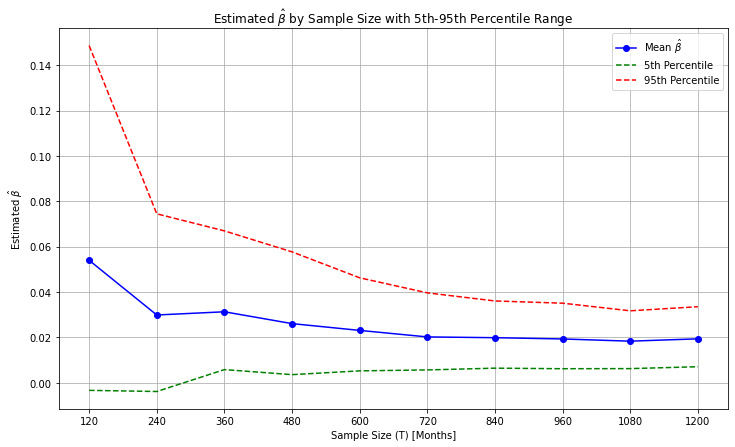

In [58]:
print(results.dtypes)
results['Mean'] = pd.to_numeric(results['Mean'])
results['5th Percentile'] = pd.to_numeric(results['5th Percentile'])
results['95th Percentile'] = pd.to_numeric(results['95th Percentile'])
results.index = results.index.astype(int)

# Plot results
plt.figure(figsize=(12, 7))

# Mean Estimates
plt.plot(results.index, results['Mean'], label='Mean $\hat{\\beta}$', marker='o', linestyle='-', color='blue')

# 5th and 95th Percentiles 
plt.plot(results.index, results['5th Percentile'], label='5th Percentile', linestyle='--', color='green')
plt.plot(results.index, results['95th Percentile'], label='95th Percentile', linestyle='--', color='red')

plt.xlabel('Sample Size (T) [Months]')
plt.ylabel('Estimated $\hat{\\beta}$')
plt.title('Estimated $\hat{\\beta}$ by Sample Size with 5th-95th Percentile Range')
plt.legend()
plt.grid(True)
plt.xticks(results.index)  
plt.show()

# Answer : As we have more data, the bias decreases and we have a more precise estimator. 



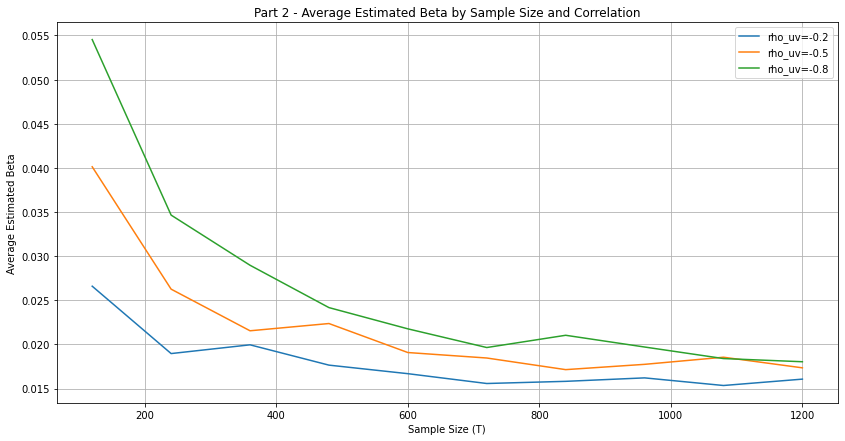

In [59]:
# Part 2: Get the error terms all  at once. 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
alpha = 0
beta = 0.015
sigma_u = 0.053
theta = 0
sigma_v = 0.044
rho = 0.98
#T_values = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]  # Sample sizes
T_values = np.arange(120, 1201, 120)
rho_uv_values = [-0.2, -0.5, -0.8]
B = 250 
results = pd.DataFrame(columns=rho_uv_values, index=T_values, dtype=np.float64)

# Simulation
for rho_uv in rho_uv_values:
    for T in T_values:
        beta_hat_samples = []
        for b in range(B):
            # Correlated errors
            cov_matrix = [[sigma_u**2, rho_uv * sigma_u * sigma_v],
                          [rho_uv * sigma_u * sigma_v, sigma_v**2]]
            errors = np.random.multivariate_normal([0, 0], cov_matrix, size=T)
            ut = errors[:, 0]
            vt = errors[:, 1]

            
            x = np.zeros(T)  
            r = np.zeros(T)  

            x[0] = theta + rho * 0 + vt[0]  

            for t in range(1, T):
                x[t] = theta + rho * x[t-1] + vt[t]  
                r[t] = alpha + beta * x[t-1] + ut[t]  

            #
            x_lagged = sm.add_constant(x[:-1])  
            r = r[1:]  
            model = sm.OLS(r, x_lagged).fit()
            beta_hat_samples.append(model.params[1])  
            

        # Store the average beta_hat for the current rho_uv and T
        results.at[T, rho_uv] = np.mean(beta_hat_samples)


plt.figure(figsize=(14, 7))
for rho_uv in rho_uv_values:
    plt.plot(results.index, results[rho_uv], label=f'rho_uv={rho_uv}')
plt.xlabel('Sample Size (T)')
plt.ylabel('Average Estimated Beta')
plt.title('Part 2 - Average Estimated Beta by Sample Size and Correlation')
plt.legend()
plt.grid(True)
plt.show()

# We observe a pattern related to the residual correlation and bias as the sample size changes. For a negative residual correlation, the estimated coefficient tends to be biased upwards towards zero. The negative correlation induces a downward pressure on the covariance matrix. 
# Similar to part 1, as the sample size increases, the bias declines. But the rate varies with residual correlation. More negative residual correlation exhibit a larger initial bias and a slower convergence to the true value of the parameter.


Simulating for rho_uv=-0.8: 100%|██████████| 10/10 [02:31<00:00, 15.13s/it]


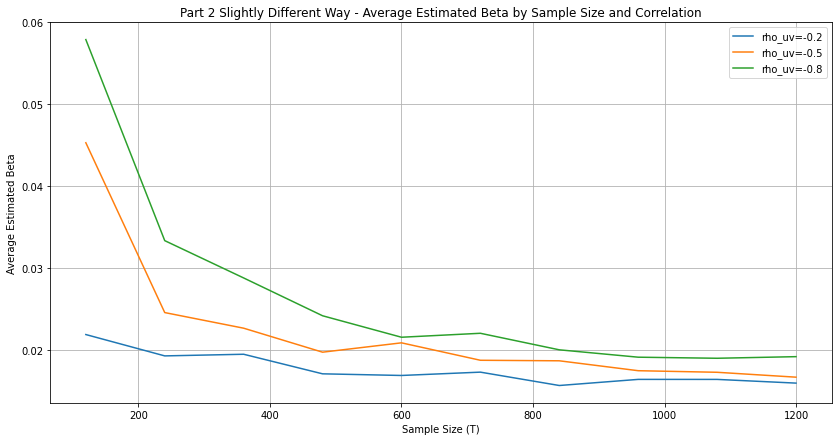

In [60]:
# Part 2: Get the error terms at each t, one-by-one. Additional Check for one part of my code.

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define parameters
alpha = 0
beta = 0.015
sigma_u = 0.053
theta = 0
sigma_v = 0.044
rho = 0.98
#T_values = [120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200]  # Sample sizes
T_values = np.arange(120, 1201, 120)
rho_uv_values = [-0.2, -0.5, -0.8]
B = 250  


results = pd.DataFrame(columns=rho_uv_values, index=T_values, dtype=np.float64)


for rho_uv in rho_uv_values:
    for T in tqdm(T_values, desc=f'Simulating for rho_uv={rho_uv}'):
        beta_hat_samples = []
        for b in range(B):
            
            x = np.zeros(T)
            r = np.zeros(T)

            # Covariance matrix for error generation
            cov_matrix = [[sigma_u**2, rho_uv * sigma_u * sigma_v], [rho_uv * sigma_u * sigma_v, sigma_v**2]]

            for t in range(1, T):
                
                ut, vt = np.random.multivariate_normal([0, 0], cov_matrix)

                
                x[t] = theta + rho * x[t-1] + vt
                r[t] = alpha + beta * x[t-1] + ut

            
            x_lagged = sm.add_constant(x[:-1])  
            model = sm.OLS(r[1:], x_lagged).fit()  
            beta_hat_samples.append(model.params[1])  

        
        results.at[T, rho_uv] = np.mean(beta_hat_samples)


plt.figure(figsize=(14, 7))
for rho_uv in rho_uv_values:
    plt.plot(results.index, results[rho_uv], label=f'rho_uv={rho_uv}')
plt.xlabel('Sample Size (T)')
plt.ylabel('Average Estimated Beta')
plt.title('Part 2 Slightly Different Way - Average Estimated Beta by Sample Size and Correlation')
plt.legend()
plt.grid(True)
plt.show()
